In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import matplotlib.colors
import matplotlib.cm as cm
from biomkr import *

# Define the wavelength range used for our simulations
wavelengths = np.linspace(950, 1750, 128)

# LED simulation by two skewed gauss curves

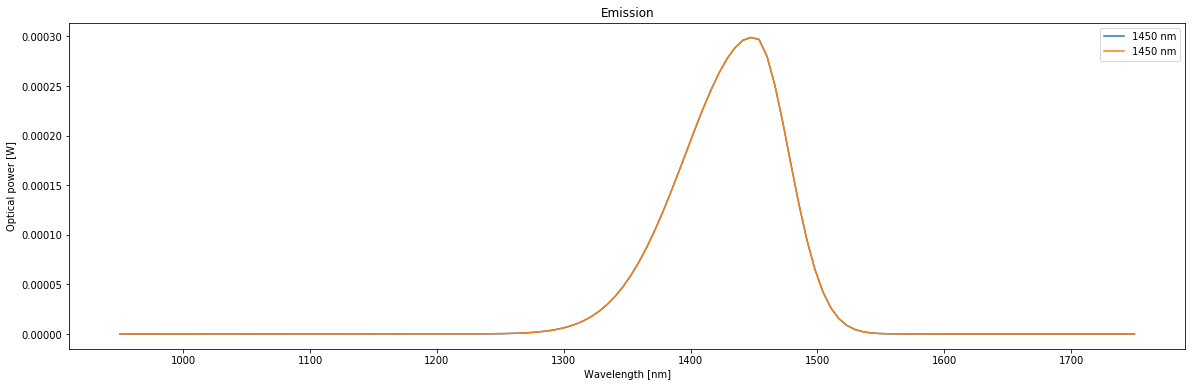

In [2]:
## ILLUMINATION

# Define LED illumination, assume linear relation betwwen current and optical output
leds = [LED(wavelengths, (700/700) * 0.0003, 1450, 80)]
#        LED(wavelengths, (1000/1000) * 0.00024, 1550, 102)]
#        LED(wavelengths, (600/600) * 0.00009, 1650, 120), 
#        LED(wavelengths, (600/600) * 0.00009, 1650, 120)] 
illumination = Illumination(wavelengths, leds)
illumination.plot()
#illumination.power_out()

In [3]:
LED(np.linspace(1449, 1451, 3), (700/700) * 0.0003, 1450, 80).response_curve

array([0.00029995, 0.0003    , 0.0002998 ])

# Read data recorded in incubator

In [4]:
# Read file - two last data sets of all sessions remaining
df = pd.read_csv("2020-01-29-LEDcurve.txt", sep="\t", decimal=",")
df_dark = pd.read_csv("2020-01-29-LEDcurve_dark.txt", sep="\t", decimal=",")

In [5]:
df_wl = pd.DataFrame(df.T.iloc[0]).set_index("Wavelength [nm]").T
df_dark_wl = pd.DataFrame(df_dark.T.iloc[0]).set_index("Wavelength [nm]").T

In [6]:
df_data = pd.DataFrame(df.T[1::2])
df_dark_data = pd.DataFrame(df_dark.T[1::2])

In [7]:
df_data.columns=df_wl.columns
df_dark_data.columns=df_dark_wl.columns

In [8]:
#df_data.drop([0], axis=1)
df_X = df_data - df_dark_data.mean()
df_Y = pd.DataFrame({'Y': [15,15,15,15,15,15,15,15,15,15, 20,20,20,20,20,20,20,20,20,20, 25,25,25,25,25,25,25,25,25,25, 30,30,30,30,30,30,30,30,30,30,  35,35,35,35,35, 40,40,40,40,40,40,40,40,40,40, 45,45,45,45,45,45,45,45,45,45]}, index=df_X.index)
df_combined = df_X
df_combined['Y'] = df_Y

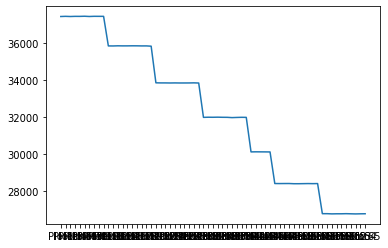

In [9]:
plt.plot(pd.DataFrame(df_combined.T.iloc[60])) #1404.38 nm
#plt.plot(pd.DataFrame(df_combined.T.iloc[65])) #1445.53 nm
#plt.plot(pd.DataFrame(df_combined.T.iloc[70])) #1486.66 nm

## Dark noise

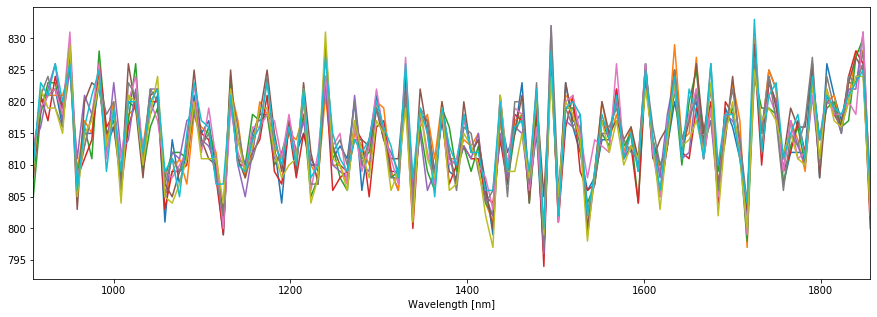

In [10]:
df_dark_data.T.plot(legend=False, figsize=(15,5))

## Raw data from 15 - 45 *C

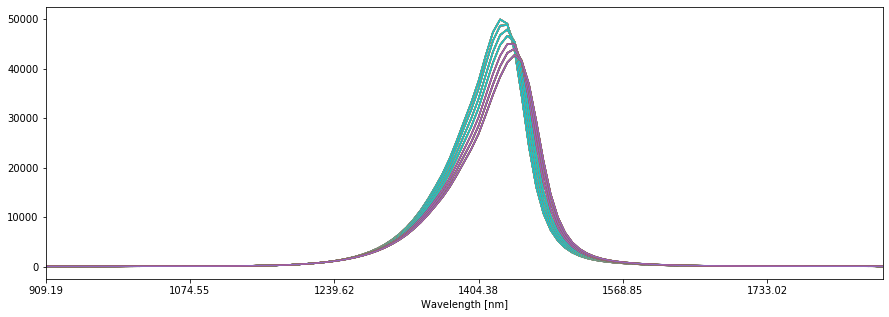

In [11]:
df_combined.T.plot(legend=False, figsize=(15,5))

In [33]:
df_combined.to_csv("2020-01-30-LEDcurve-combined.csv", index=False)

In [12]:
dff = df_combined.reset_index(drop=True)

## Write raw data to file for autoprogramming

In [82]:
# make file for autoprogramming in rolando's format
with open('auto.csv', 'w') as the_file:
    for index, row in dff.iterrows():
        for ind, column in enumerate(dff.columns):
            if ind != 116:
                the_file.write("{},{},{:0.2f}\n".format(column, row.iloc[116], row.loc[column]))

## Raw dataset view

In [13]:
dff

Wavelength [nm],909.19,917.46,925.74,934.01,942.29,950.56,958.83,967.1,975.37,983.64,...,1790.41,1798.61,1806.8,1815.0,1823.19,1831.38,1839.58,1847.77,1855.96,Y
0,20.0,29.0,29.0,32.6,30.2,34.2,35.8,41.3,43.0,45.6,...,64.2,66.3,63.4,58.9,66.7,57.6,55.7,51.6,50.7,15
1,23.0,31.0,35.0,34.6,30.2,32.2,41.8,47.3,45.0,46.6,...,68.2,65.3,70.4,66.9,62.7,62.6,56.7,56.6,49.7,15
2,22.0,31.0,32.0,27.6,35.2,33.2,39.8,42.3,44.0,42.6,...,66.2,66.3,67.4,67.9,60.7,63.6,57.7,56.6,52.7,15
3,24.0,32.0,30.0,34.6,30.2,37.2,38.8,45.3,45.0,47.6,...,66.2,64.3,67.4,65.9,67.7,59.6,56.7,53.6,55.7,15
4,24.0,32.0,34.0,26.6,39.2,32.2,37.8,46.3,43.0,42.6,...,69.2,62.3,64.4,67.9,64.7,59.6,57.7,57.6,54.7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,24.0,29.0,29.0,31.6,27.2,34.2,34.8,36.3,39.0,39.6,...,67.2,61.3,63.4,62.9,64.7,59.6,60.7,59.6,59.7,45
61,27.0,29.0,29.0,28.6,27.2,33.2,34.8,38.3,35.0,40.6,...,62.2,62.3,62.4,65.9,58.7,58.6,56.7,57.6,52.7,45
62,24.0,28.0,25.0,26.6,29.2,31.2,37.8,36.3,37.0,40.6,...,65.2,62.3,62.4,64.9,59.7,56.6,55.7,59.6,51.7,45
63,24.0,33.0,26.0,25.6,30.2,31.2,34.8,38.3,34.0,43.6,...,67.2,56.3,62.4,63.9,61.7,62.6,57.7,52.6,55.7,45


### Insert autoprogramming magic here :-)

# Autoprogramming results
## First lets define functions resulting from the process

In [14]:
def f(X,T,L):
    return ( 2.0 * ( 0.6066265916878997E4 + 2.0 * T ) / L - 0.8745625475377816E1 ) * ( X - -0.10549851050631093 )

In [26]:
def intensity(T,L):
    return L / ( 0.4088077437658207E-1 +  f( f( f( f( math.exp( f( -0.14506359921876406E1 ,T,L)),T,L),T,L),T,L),T,L) + T / 0.5581139012716659E4 )

## Run simulations with the function through wavelengths and temperatures used in the raw data recording and plot the results

In [140]:
wls = np.array(dff.columns[:116], dtype=np.float32)

m=[]
temps=[]
for temp in range(15,50,5):
    r=[]
    for wl in np.nditer(wls):
        r.append(intensity(temp,wl))
    m.append(r)
    temps.append(temp)
dfs= pd.DataFrame(m,index=temps,columns=wls)

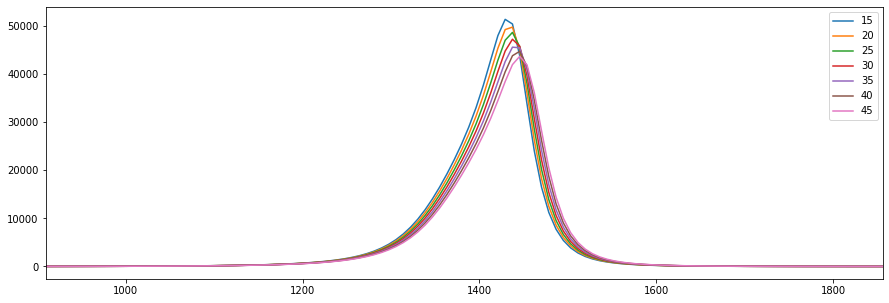

In [141]:
dfs.T.plot(figsize=(15,5))

## How well does this correlate?
Lets take the mean of the raw data corresponding to each temperature level and calculate the r^2 coefficient

In [154]:
raw = dff[dff['Y'] == 15].mean().to_numpy()
raw = raw[:116] # just remove the temperature column
sim = dfs.loc[15].to_numpy()

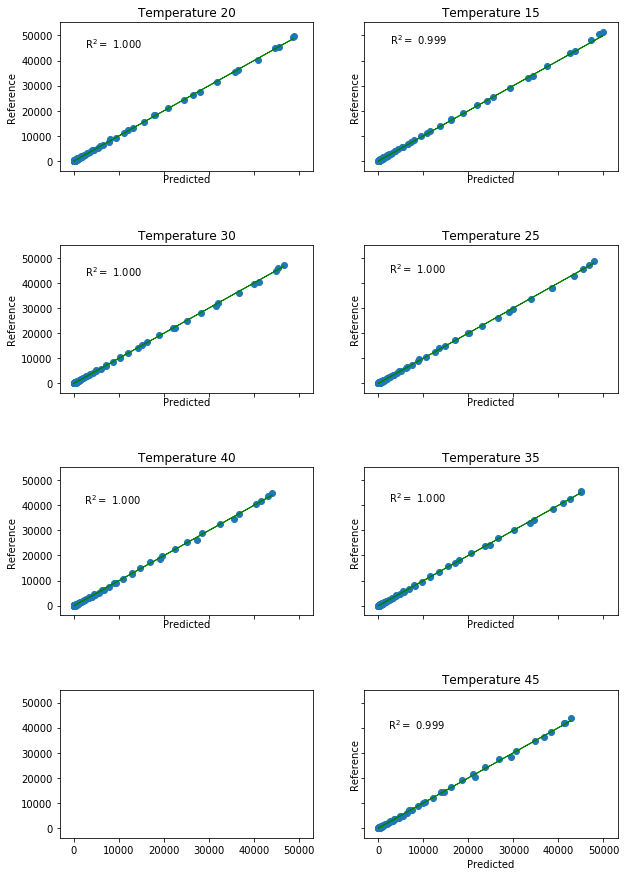

In [201]:
from sklearn.metrics import mean_squared_error, r2_score

fig, ax = plt.subplots(4,2,figsize=(10,15), sharex=True, sharey=True, gridspec_kw={'hspace': 0.5})

a=0
b=1
for temp in range(15,50,5):
    # Extract data
    raw = dff[dff['Y'] == temp].mean().to_numpy()
    raw = raw[:116] # just remove the temperature column
    sim = dfs.loc[temp].to_numpy()

    # Regression fit line
    z = np.polyfit(raw, sim, 1)
    #plt.plot(z[1]+z[0]*raw, sim, c='blue', linewidth=1)
    ax[a,b].plot(raw, raw, color='green', linewidth=1)
    ax[a,b].scatter(raw,sim)
    
    # Plot regression and figures of merit
    rangey = max(raw) - min(raw)
    rangex = max(sim) - min(sim)

    # Print the scores
    score_p = r2_score(raw, sim)
    mse_p = mean_squared_error(raw, sim)
    ax[a,b].text(min(sim)+0.05*rangex, max(sim)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
    ax[a,b].set_title("Temperature {}".format(temp))
    ax[a,b].set_xlabel('Predicted')
    ax[a,b].set_ylabel('Reference')

    if b is 0:
        a += 1
        b += 1
    else:
        b = 0


plt.show()